In [2]:
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import networkx as nx

# Functions

In [3]:
def data_read():
    data=pd.read_csv("../data/names_of_perpetrators.csv")
    terror_plot=data['terror_plot']
    state_charged=data['state_charged']
    last_residency_state=data['last_residency_state']
    #data.head()
    plots=pd.read_csv("../data/terror_plots.csv")
    t_plot=plots['name']
    #plots.head()
    return terror_plot,t_plot,state_charged,last_residency_state

In [4]:
def hypergraph(terror_plot,t_plot,state_charged,last_residency_state):
    H1=[[0.0]*(len(terror_plot)) for i in range(len(t_plot))]
    for i in range(len(t_plot)):
        for j in range(len(terror_plot)):
            if(t_plot[i]==terror_plot[j]):
                H1[i][j]=1
    #print(H[1])
    H1=np.transpose(H1)
    H2=[[0.0]*(len(state_charged)) for i in range(len(state_charged))]
    for i in range(len(H2)):
        for j in range(len(H2)):
            if(i!=j and state_charged[i]==state_charged[j]):
                H2[i][j]=1
    H3=[[0.0]*(len(last_residency_state)) for i in range(len(last_residency_state))]
    for i in range(len(H3)):
        for j in range(len(H3)):
            if(i!=j and last_residency_state[i]==last_residency_state[j]):
                H3[i][j]=1
    H2=np.array(H2)
    H3=np.array(H3)
    #print(H1.shape)
    #print(H2.shape)
    #print(H3.shape)
    H=np.hstack((H1,H2,H3))
    S = sparse.csr_matrix(H) 
    Hn=S.todense()
    adjacency=np.matmul(Hn,np.transpose(Hn))
    
    return Hn,adjacency


In [5]:
def deconv(adjacency):
    adjacency[adjacency>1]=1
    #Network Deconvolution
    H_deconv=np.matmul(adjacency,np.linalg.inv(np.identity(len(adjacency))+adjacency))
    return H_deconv

In [6]:
def show_graph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=20)
    plt.show()


# Main

In [13]:
terror_plot,t_plot,state_charged,last_residency_state=data_read()

In [14]:
Hn,adjacency=hypergraph(terror_plot,t_plot,state_charged,last_residency_state)

In [15]:
"""tmp=np.transpose(H)
print(H[51])"""

'tmp=np.transpose(H)\nprint(H[51])'

In [16]:
adjacency=np.array(adjacency)

In [17]:
adjacency

array([[39.,  0., 37., ...,  0., 37.,  0.],
       [ 0.,  9.,  0., ...,  0.,  0.,  0.],
       [37.,  0., 78., ...,  0., 75.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 75.,  0.,  0.],
       [37.,  0., 75., ...,  0., 78.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 58.]])

In [18]:
H_deconv=deconv(adjacency)

In [19]:
H_deconv

array([[ 1.71397805e-01,  0.00000000e+00, -1.05261746e-02, ...,
        -1.82768099e-05, -1.05261746e-02, -7.76964909e-03],
       [ 0.00000000e+00,  3.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.05261746e-02,  0.00000000e+00,  2.94373972e-02, ...,
        -1.42834805e-06,  2.94373972e-02, -6.07204603e-04],
       ...,
       [-1.82768099e-05,  0.00000000e+00, -1.42834805e-06, ...,
         5.90222086e-02, -1.42834805e-06, -4.42431709e-02],
       [-1.05261746e-02,  0.00000000e+00,  2.94373972e-02, ...,
        -1.42834805e-06,  2.94373972e-02, -6.07204603e-04],
       [-7.76964909e-03,  0.00000000e+00, -6.07204603e-04, ...,
        -4.42431709e-02, -6.07204603e-04, -1.79071349e+01]])

In [20]:
#H_deconv

C:\Users\Anup-Patel\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


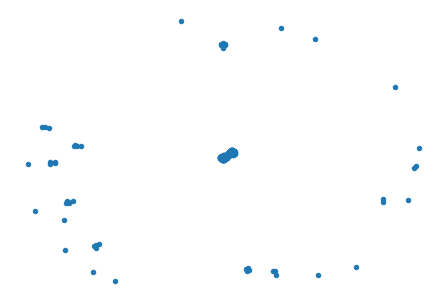

In [21]:
#Plot graph
show_graph(H_deconv)

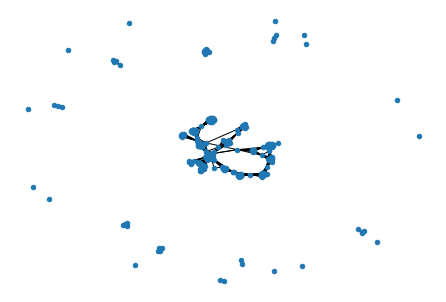

In [22]:
show_graph(adjacency)